Our primary dataset:

Eurosat

[DOI](10.1109/IGARSS.2018.8519248)

[dataset](https://zenodo.org/records/7711810#.ZAm3k-zMKEA)


download EuroSAT_MS.zip (the full spectral dataset) and extract it into this directory

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

In [11]:
import zipfile
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import io

zip_path = './EuroSAT.zip'
all_files = []
labels = []

# Collect file paths and labels
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        if file_name.endswith('.jpg'):
            all_files.append(file_name)
            labels.append(file_name.split('/')[1])  # folder name = class label

print("Total images:", len(all_files))

# Train/test split
train_files, test_files, y_train, y_test = train_test_split(
    all_files, labels, test_size=0.2, random_state=42, stratify=labels
)

# Function to load image as numpy array from zip
def load_images_from_zip(zip_path, file_list):
    images = []
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for file_name in file_list:
            with zip_ref.open(file_name) as file:
                img = Image.open(file).convert("RGB")  # ensure 3-channel RGB
                images.append(np.array(img))
    return np.array(images, dtype=object)  # dtype=object since shapes may differ

# Load images into numpy arrays
X_train = load_images_from_zip(zip_path, train_files)
X_test = load_images_from_zip(zip_path, test_files)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("One image shape:", X_train[0].shape)
print("One label:", y_train[0])


Total images: 27000
Training set size: 21600
Test set size: 5400
One image shape: (64, 64, 3)
One label: AnnualCrop


In [16]:
import zipfile
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import io

zip_path = './EuroSAT.zip'
all_files = []
labels = []

# Collect file paths and labels
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        if file_name.endswith('.jpg'):
            all_files.append(file_name)
            labels.append(file_name.split('/')[1])  # folder name = class label

print("Total images:", len(all_files))

# Train/test split
train_files, test_files, y_train, y_test = train_test_split(
    all_files, labels, test_size=0.2, random_state=42, stratify=labels
)

# ✅ Only keep 1/10 of training and testing data for quick testing
n_train_small = len(train_files) // 10
n_test_small = len(test_files) // 10

train_files_small = train_files[:n_train_small]
test_files_small = test_files[:n_test_small]
y_train_small = y_train[:n_train_small]
y_test_small = y_test[:n_test_small]

print(f"Using {n_train_small} training samples and {n_test_small} test samples for quick run.")

# Function to load image as numpy array from zip
def load_images_from_zip(zip_path, file_list):
    images = []
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for file_name in file_list:
            with zip_ref.open(file_name) as file:
                img = Image.open(file).convert("RGB")  # ensure 3-channel RGB
                images.append(np.array(img))
    return np.array(images, dtype=object)  # dtype=object since shapes may differ

# Load smaller subsets into numpy arrays
X_train = load_images_from_zip(zip_path, train_files_small)
X_test = load_images_from_zip(zip_path, test_files_small)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("One image shape:", X_train[0].shape)
print("One label:", y_train_small[0])


Total images: 27000
Using 2160 training samples and 540 test samples for quick run.
Training set size: 2160
Test set size: 540
One image shape: (64, 64, 3)
One label: AnnualCrop


In [17]:
print(X_test.shape)

(540, 64, 64, 3)


In [33]:
all_names = sorted(set(list(y_train) + list(y_test)))
class_to_idx = {name: i for i, name in enumerate(all_names)}
idx_to_class = {i: name for name, i in class_to_idx.items()}

y_train_idx = np.array([class_to_idx[y] for y in y_train_small], dtype=np.int64)
y_test_idx  = np.array([class_to_idx[y] for y in y_test_small],  dtype=np.int64)
num_classes = len(all_names)
print(f"{num_classes} classes:", all_names[:5], "...")
print(y_train_idx)

10 classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial'] ...
[0 6 9 ... 3 7 2]


In [32]:
y_train

['AnnualCrop',
 'PermanentCrop',
 'SeaLake',
 'SeaLake',
 'Residential',
 'HerbaceousVegetation',
 'HerbaceousVegetation',
 'PermanentCrop',
 'Industrial',
 'HerbaceousVegetation',
 'Residential',
 'Forest',
 'River',
 'PermanentCrop',
 'Highway',
 'Residential',
 'Pasture',
 'Pasture',
 'River',
 'AnnualCrop',
 'Residential',
 'River',
 'Forest',
 'PermanentCrop',
 'Forest',
 'HerbaceousVegetation',
 'Pasture',
 'River',
 'AnnualCrop',
 'HerbaceousVegetation',
 'River',
 'Pasture',
 'Forest',
 'Forest',
 'AnnualCrop',
 'Forest',
 'River',
 'Highway',
 'AnnualCrop',
 'AnnualCrop',
 'AnnualCrop',
 'SeaLake',
 'HerbaceousVegetation',
 'PermanentCrop',
 'River',
 'Pasture',
 'Forest',
 'Highway',
 'Residential',
 'SeaLake',
 'SeaLake',
 'HerbaceousVegetation',
 'PermanentCrop',
 'SeaLake',
 'River',
 'Industrial',
 'PermanentCrop',
 'Residential',
 'Industrial',
 'Residential',
 'Residential',
 'SeaLake',
 'Industrial',
 'AnnualCrop',
 'PermanentCrop',
 'Forest',
 'HerbaceousVegetation',


In [34]:
import torch

# 把每一张图片单独转成 float32 tensor
def safe_stack(data):
    tensors = []
    for i, img in enumerate(data):
        if isinstance(img, torch.Tensor):
            tensors.append(img)
        else:
            t = torch.tensor(img, dtype=torch.float32)
            tensors.append(t)
    return torch.stack(tensors)

# 转换 HWC -> CHW
X_train_t = safe_stack(X_train).permute(0, 3, 1, 2).contiguous()
X_test_t  = safe_stack(X_test).permute(0, 3, 1, 2).contiguous()

# 标签
y_train_t = torch.tensor(list(y_train_idx), dtype=torch.long)
y_test_t  = torch.tensor(list(y_test_idx), dtype=torch.long)

print("✅ Converted shapes:")
print("X_train_t:", X_train_t.shape)
print("y_train_t:", y_train_t.shape)


✅ Converted shapes:
X_train_t: torch.Size([2160, 3, 64, 64])
y_train_t: torch.Size([2160])


In [35]:
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=64, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_t,  y_test_t),  batch_size=64, shuffle=False)

# ---- 3. Define a simple CNN model ----
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2)

        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.gap(x).flatten(1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=len(torch.unique(y_train_t))).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# ---- 5. Train the model ----
EPOCHS = 10
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_loader.dataset)

    # evaluate quickly on test set
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb).argmax(dim=1)
            correct += (preds == yb).sum().item()
            total += xb.size(0)
    acc = correct / total
    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {avg_loss:.4f}, Test Acc: {acc:.4f}")

print("Training finished ✅")

Epoch 1/10 - Loss: 1.6640, Test Acc: 0.1852
Epoch 2/10 - Loss: 1.1144, Test Acc: 0.5093
Epoch 3/10 - Loss: 0.9428, Test Acc: 0.6463
Epoch 4/10 - Loss: 0.8043, Test Acc: 0.6963
Epoch 5/10 - Loss: 0.7444, Test Acc: 0.7093
Epoch 6/10 - Loss: 0.7155, Test Acc: 0.7148
Epoch 7/10 - Loss: 0.7007, Test Acc: 0.6574
Epoch 8/10 - Loss: 0.6934, Test Acc: 0.6667
Epoch 9/10 - Loss: 0.6316, Test Acc: 0.4611
Epoch 10/10 - Loss: 0.6047, Test Acc: 0.5630
Training finished ✅


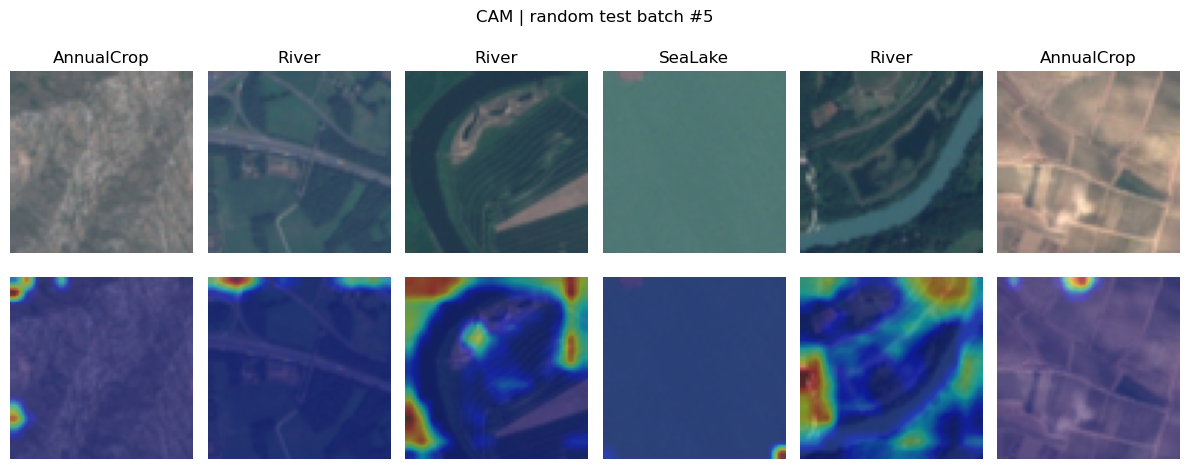

In [51]:
import random
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

model.eval()

#  pick a random batch
rand_idx = random.randint(0, len(test_loader) - 1)
xb = yb = None
for b_idx, (xb_tmp, yb_tmp) in enumerate(test_loader):
    if b_idx == rand_idx:
        xb, yb = xb_tmp.to(device), yb_tmp.to(device)
        break
assert xb is not None, "Failed to fetch a random batch."

# get hook last conv output 
features = []
def hook_fn(module, inp, out):
    features.append(out.detach())
hook = model.bn3.register_forward_hook(hook_fn)

# forward on the RANDOM batch 
with torch.no_grad():
    logits = model(xb)
pred_idx = logits.argmax(dim=1)
A = features.pop()
hook.remove()

# get fc weights 
W = model.fc2.weight.detach()

# visualize 
n_show = min(6, xb.size(0))
fig, axes = plt.subplots(2, n_show, figsize=(12, 5))
for i in range(n_show):
    cls = pred_idx[i]
    cam = torch.einsum('k,khw->hw', W[cls], A[i])
    cam = F.relu(cam)
    cam = (cam - cam.min()) / (cam.max() + 1e-8)
    cam_up = F.interpolate(cam[None, None], size=(64, 64), mode='bilinear', align_corners=False)[0, 0]

    img = xb[i].detach().permute(1, 2, 0).cpu().tolist()
    axes[0, i].imshow(img); axes[0, i].set_title(f"{idx_to_class[int(cls)]}"); axes[0, i].axis("off")
    axes[1, i].imshow(img); axes[1, i].imshow(cam_up.cpu().tolist(), alpha=0.45, cmap='jet'); axes[1, i].axis("off")

plt.suptitle(f"CAM | random test batch #{rand_idx}")
plt.tight_layout()
plt.show()


In [47]:
#CAM(Class Activation Map): shows how much each spatial position contributes to class
#The CAM shows positive evidence for the predicted class — 
#where the network found the strongest discriminative patterns.
#CAM use the last convolutional layer after global average pooling (GAP) 
#and weight matrix in fully connected layer to determain contribution in each pixel.